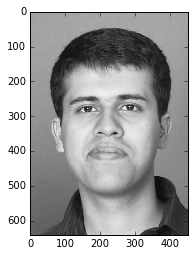

In [1]:
import numpy as np
import cv2
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
%matplotlib inline

face_cascade = cv2.CascadeClassifier('C:/Users/Omar Saleem Mohammed/Downloads/DoNotBackup/opencv/sources/data/haarcascades/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('C:/Users/Omar Saleem Mohammed/Downloads/DoNotBackup/opencv/sources/data/haarcascades/haarcascade_eye.xml')
 
#image = cv2.imread("C:/Users/Omar Saleem Mohammed/Downloads/Abhay/7.jpg")
image = cv2.imread("C:/Users/Omar Saleem Mohammed/Downloads/Abhay/Abhay__7.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap= cm.Greys_r)

In [3]:
recognizer = cv2.createLBPHFaceRecognizer()

AttributeError: 'module' object has no attribute 'createLBPHFaceRecognizer'

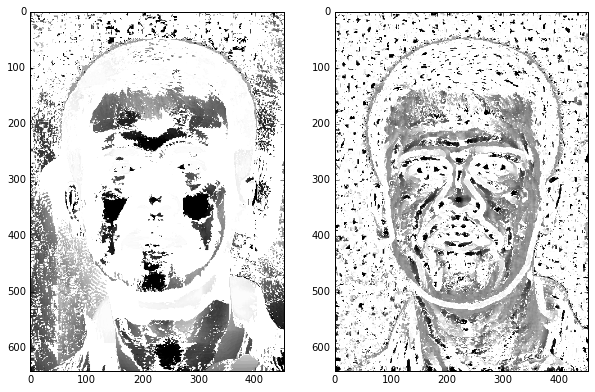

In [24]:
from skimage.feature import local_binary_pattern
# settings for LBP
radius = 50
n_points = 1 * radius 
LBP1 = local_binary_pattern(gray,n_points,radius,'uniform')

radius = 10
n_points = 10 * radius 
LBP2 = local_binary_pattern(gray,n_points,radius,'uniform')



#plt.figure(1)
fig = plt.figure(figsize=(10,10))

#plt.subplot(2,2,1)
fig.add_subplot(1,2,1)
plt.imshow(LBP1,cmap=cm.Greys_r)
#plt.show()

#plt.subplot(2,2,2)
fig.add_subplot(1,2,2)
plt.imshow(LBP2,cmap=cm.Greys_r)
plt.show()


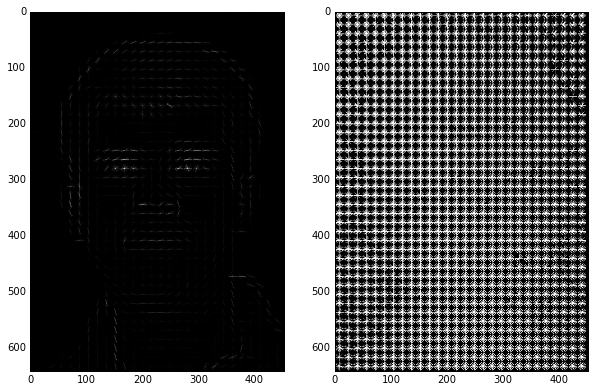

In [119]:
from skimage.feature import hog
from skimage import data, color, exposure

fd, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))


#plt.figure(1)
fig = plt.figure(figsize=(10,10))

#plt.subplot(2,2,1)
fig.add_subplot(1,2,1)
plt.imshow(hog_image,cmap=cm.Greys_r)
#plt.show()

#plt.subplot(2,2,2)
fig.add_subplot(1,2,2)
plt.imshow(hog_image_rescaled,cmap=cm.Greys_r)
plt.show()

In [122]:
import cv2
laplacian = cv2.Laplacian(gray,cv2.CV_64F)
plt.imshow(laplacian,cmap=cm.Greys_r)

TypeError: Required argument 'ddepth' (pos 2) not found

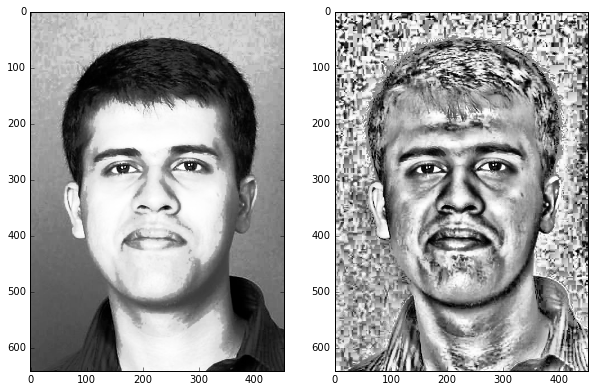

In [94]:
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank
# Global equalize
img_rescale = exposure.equalize_hist(gray)

# Equalization
selem = disk(30)
img_eq = rank.equalize(gray, selem=selem)

#plt.figure(1)
fig = plt.figure(figsize=(10,10))

#plt.subplot(2,2,1)
fig.add_subplot(1,2,1)
plt.imshow(img_rescale,cmap=cm.Greys_r)
#plt.show()

#plt.subplot(2,2,2)
fig.add_subplot(1,2,2)
plt.imshow(img_eq,cmap=cm.Greys_r)
plt.show()

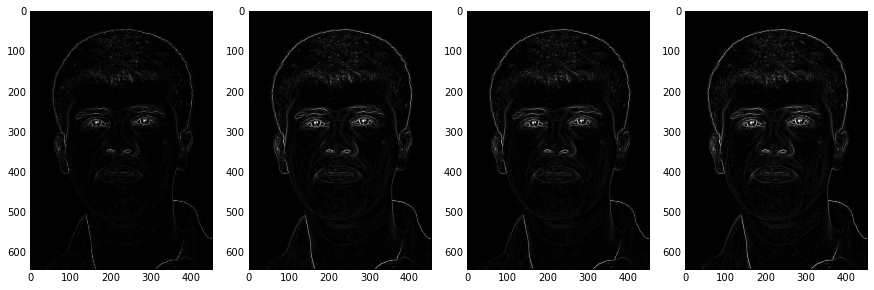

In [91]:
from skimage.filters import roberts, sobel, scharr, prewitt

#method = {‘default’, ‘ror’, ‘uniform’, ‘var’}
robert_gray = roberts(gray)
sobel_gray = sobel(gray)
scharr_gray = scharr(gray)
prewitt_gray = prewitt(gray)

#plt.figure(1)
fig = plt.figure(figsize=(15,15))

#plt.subplot(2,2,1)
fig.add_subplot(1,4,1)
plt.imshow(robert_gray,cmap=cm.Greys_r)
#plt.show()

#plt.subplot(2,2,2)
fig.add_subplot(1,4,2)
plt.imshow(sobel_gray,cmap=cm.Greys_r)
#plt.show()

#plt.subplot(2,2,3)
fig.add_subplot(1,4,3)
plt.imshow(scharr_gray,cmap=cm.Greys_r)
#plt.show()

#plt.subplot(2,2,4)

fig.add_subplot(1,4,4)
plt.imshow(prewitt_gray,cmap=cm.Greys_r)
plt.show()


#plt.imshow(edges,cmap=cm.Greys_r)

In [166]:
gray

array([[142, 142, 142, ..., 143, 143, 143],
       [142, 142, 142, ..., 143, 143, 143],
       [142, 142, 142, ..., 143, 143, 143],
       ..., 
       [ 86,  86,  86, ...,  50,  50,  50],
       [ 86,  86,  86, ...,  51,  51,  52],
       [ 87,  87,  87, ...,  53,  52,  50]], dtype=uint8)

In [167]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=7,
    minSize=(40, 40))
print "Found {0} faces!".format(len(faces))

Found 1 faces!


In [140]:
for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 0), 2)
#(x,y,w,h) in faces
    fac = np.array(gray)[y:(y+h),x:(x+h)]
    plt.imshow(fac,cmap= cm.Greys_r)

In [4]:
i = 0
fac = []
for (x,y,w,h) in faces:
    fac.append(np.array(image)[y:(y+h),x:(x+h)])
    #plt.imshow(fac[i],cmap= cm.Greys_r)
    i+=1

In [5]:
from skimage.transform import resize
out = resize(fac[0], (96,96))

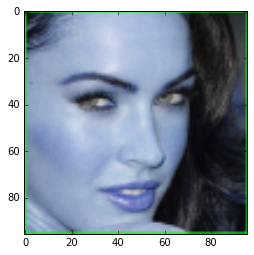

In [6]:
plt.imshow(out)

In [7]:
len(faces)

1

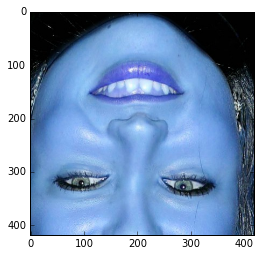

In [216]:
plt.imshow(fac[2])

3